# CS 156a - Final Exam

## Patrone Samuel, 2140749

The following notebook is publicly available at https://github.com/spatrone/CS156A-Caltech.git.

# Non-linear Transform

## Problem 1

### Answer: [e] None of the above.

### Derivation:

Let's consider the general $\mathcal{Q}$th order polynomial transform $\Phi_\mathcal{Q}$ for the space $\mathcal{x}=\mathbb{R}^d$. We can find the dimensionality $\tilde{d}$ of the feature space $\mathcal{Z}$ by observing that we can form $C(d,k)$ different monomials of order $k$ from the $d$ initial coordinates, where 

\begin{equation}
C(d,k)={d+k-1 \choose k}\,.
\end{equation}

Since $\Phi_\mathcal{Q}$ will have all possible monomials up to order $\mathcal{Q}$ as transformed coordinates, the feature space $\mathcal{Z}$ will have a dimensionality

\begin{equation}
\tilde{d}(Q,d)=\sum^Q_{k=1}{d+k-1 \choose k}\,.
\end{equation}

For $d=2$ and $Q=10$, we get

\begin{equation}
\tilde{d}(Q=10,d=2)=\sum^Q_{k=1}{k+1 \choose k}= \sum^Q_{k=1} k+1 = \frac{Q(Q+3)}{2} = \frac{10 \times 13}{2}=65\,.
\end{equation}

# Bias and Variance

## Problem 2

### Answer: [d] $\mathcal{H}$ is the logistic regression model.

### Derivation:

By definition of average hypothesis, 

\begin{equation}
\bar{g}=\frac{1}{K}\sum_{k=1}^K g_k\,,
\end{equation}

where $g_k$ is the final hypothesis generated by the dataset $\mathcal{D}_k$. Since the average hypothesis is a linear combination of hypothesis taken from the space $\mathcal{H}$, only a linear combination of non-linear functions can be outside of $\mathcal{H}$.
Specifically, for the case of logistic regression we use a non-linear functions as the sigmoid or the hyperbolic tangent, whose linear combinations are not generally sigmoids or hyperbolic tangents respectively.

# Overfitting

## Problem 3

### Answer: [d] We can always determine if there is overfitting by comparing the values of $(E_{out}-E_{in})$.

### Derivation:

Overfitting is, by definition, the case in which, between two hypothesis, the one with lower $E_{in}$ is preferred, and it results in an higher $E_{out}$. This happens because $E_{in}$ starts loosing track of $E_{out}$ since the chosen hypothesis is fitting the noise (stochastic or deterministic).
If there is overfitting, there must be two or more hypothesis that have different values of $(E_{out}-E_{in})$. However, comparing the values of $(E_{out}-E_{in})$ for two hypothesis does not always determine of there is overfitting in choosing the one with a lower $E_{in}$. For example, the difference between the two hypothesis in the values of $(E_{out}-E_{in})$ may depend on underfitting (which will produce an higher $E_{out}$) or stochastic properties of the test set. 

## Problem 4

### Answer: [d] Stochastic noise does not depend on the hypothesis set. 

### Derivation:

Stochastic noise is a property of the data we are given with respect to the target function and it is independent on the hypothesis set chosen. The amount of noise that can be captured by the fit depends on the hypothesis set chosen: an higher complexity of the hypothesis may reduce $E_{in}$ although resulting in an higher $E_{out}$, leading to the most common case of overfitting.

# Regularization

## Problem 5

### Answer: [a]  $\mathbf{w}_{reg}=\mathbf{w}_{lin}$

### Derivation:

If $\mathbf{w}_{lin}$ already satisfies the constrain $\mathbf{w}_{lin}^T\Gamma^T\Gamma\mathbf{w}_{lin}\le C$, the Tikhonov regularization constrain will not affect the results of linear regression, giving $\mathbf{w}_{reg}=\mathbf{w}_{lin}$. 

This result can be easily seen by noticing that the Tikhonov regularized weights $\mathbf{w}_{reg}$ is a solution of the following problem:

\begin{equation}
{\rm min}_\mathbf{w} \frac{1}{N}\sum_{n=1}^N(\mathbf{w}^T\mathbf{x}_n-y_n)^2 \;\; {\rm subject \; to} \;\; \mathbf{w}^T\Gamma^T\Gamma\mathbf{w}\le C\,.
\end{equation}

We define the soft-order constrained hypothesis set $\mathcal{H}(C)$ as

\begin{equation}
\mathcal{H}(C)=\left\{h|h(\mathbf{x})=\mathbf{w}^T\mathbf{x}, \mathbf{w}^T\Gamma^T\Gamma\mathbf{w}\le C\right\}
\end{equation}

where $\mathbf{w}_{reg}\in \mathcal{H}(C)$ by definition.

Since $\mathbf{w}_{lin}^T\Gamma^T\Gamma\mathbf{w}_{lin}\le C$, we have that $\mathbf{w}_{lin}\in\mathcal{H}(C)$. Therefore,$\mathbf{w}_{reg}=\mathbf{w}_{lin}$.


## Problem 6

### Answer: [b]  Translated into augmented error

### Derivation:

Since soft-order constraints for polynomial models are constrained minimization of $E_{in}$, we can equivalently solve an unconstrained minimization of a different function, called augmented error

\begin{equation}
E_{aug}(h,\lambda,\Omega) = E_{in}(h)+\frac{\lambda}{N}\Omega(h)\,.
\end{equation}

where $\lambda$ is a Lagrange multiplier that controls the amount of regularization, introducing a penalty term, and it is related to $C$, the parameter controlling the soft-order constrain.

For the Tikhonov regularizer above, $\Omega(h)=\mathbf{w}^T\Gamma^T\Gamma\mathbf{w}$. 

# Regularized Linear Regression

## Problems 7-8

### Answers: [d]  8 versus all, [b] 1 versus all

### Code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import data

training_set=pd.read_csv('features.train',header=None,delim_whitespace=True)
testing_set=pd.read_csv('features.test',header=None,delim_whitespace=True)

train_pts=training_set[[1, 2]].to_numpy()
train_y=training_set[0].to_numpy()

test_pts=testing_set[[1, 2]].to_numpy()
test_y=testing_set[0].to_numpy()
    
# Binary classifier

def label_n(y,n):
    res=-np.ones(len(y))
    res[y==n]=1
    return res

# Non-linear Transform

def transform(pts,nonlin=True):
    res=[]
    if(nonlin):
        for i in range(len(pts)):
            x1=pts[i][0]
            x2=pts[i][1]
            res.append([1,x1,x2,x1*x2,x1**2,x2**2])
    else:
        for i in range(len(pts)):
            x1=pts[i][0]
            x2=pts[i][1]
            res.append([1,x1,x2])
    return np.array(res)
        
#Linear Regression with weight decay

def h(pts,w):
    return np.sign(np.dot(w,pts.T))

def lin_reg_w_lam(X,y,lam):
    pinv_decay=np.dot(np.linalg.inv(np.dot(X.T,X)+lam*np.identity(len(X.T))),X.T)
    return np.dot(pinv_decay,y)

def lin_reg_wdecay(train_pts,train_y,test_pts,test_y,lam=1,res=True):
    N_train=len(train_pts)
    N_test=len(test_pts)
    
    w=lin_reg_w_lam(train_pts,train_y,lam)
    
    #Ein computation
    gin=h(train_pts,w)
    testgin=(gin==train_y)
    Ein=len(np.where(testgin==False)[0])/N_train
    
    #Eout computation
    gout=h(test_pts,w)
    testgout=(gout==test_y)
    Eout=len(np.where(testgout==False)[0])/N_test
    
    #print results
    if(res==True):
        print(f'Linear Regression results with Lambda={lam:.2f}:\nEin={Ein:.2f}\nEout={Eout:.2f}')
    
    return Ein,Eout

Ein=[]
Eout=[]
Ein_tr=[]
Eout_tr=[]
label=[]

for i in range(10):
    x_train=transform(train_pts,nonlin=False)
    z_train=transform(train_pts)
    y_train=label_n(train_y,i)
    
    x_test=transform(test_pts,nonlin=False)
    z_test=transform(test_pts)
    y_test=label_n(test_y,i)
    
    Ein_tmp,Eout_tmp=lin_reg_wdecay(x_train,y_train, x_test,y_test,res=False)
    Ein_tr_tmp,Eout_tr_tmp=lin_reg_wdecay(z_train,y_train, z_test,y_test,res=False)
    
    Ein.append(Ein_tmp)
    Ein_tr.append(Ein_tr_tmp)
    Eout.append(Eout_tmp)
    Eout_tr.append(Eout_tr_tmp)
    
    label.append('%i VS all' %i)
    
pd.options.display.float_format = '{:,.3f}'.format   
pd.DataFrame(list(zip(label,Ein,Ein_tr,Eout,Eout_tr)), columns =['Classifier', 'Ein','Ein_tr','Eout','Eout_tr'])

,Classifier,Ein,Ein_tr,Eout,Eout_tr
0,0 VS all,0.109,0.102,0.115,0.107
1,1 VS all,0.015,0.012,0.022,0.022
2,2 VS all,0.100,0.100,0.099,0.099
3,3 VS all,0.090,0.090,0.083,0.083
4,4 VS all,0.089,0.089,0.100,0.100
5,5 VS all,0.076,0.076,0.080,0.079
6,6 VS all,0.091,0.091,0.085,0.085
7,7 VS all,0.088,0.088,0.073,0.073
8,8 VS all,0.074,0.074,0.083,0.083
9,9 VS all,0.088,0.088,0.088,0.088


## Problem 9

### Answer: [e] The transform improves the out-of-sample performance of '5 versus all', but by less than 5%

### Derivation:

From the table above,

- [a] is generally false, see for example '0 vs all'
- [b] is generally false, see for example '1 vs all'
- [c] is generally false, see for example '5 vs all'
- [d] is generally false, see for example '0 vs all'
- [e] is correct, $E^{trans}_{out}({\rm 5\; vs\; all})/E_{out}({\rm 5\; vs\; all})\simeq 1.01$: the transform improves the out-of-sample performance by 1%.

## Problem 10

### Answer: [a] Overfitting occurs (from $\lambda=1$ to $\lambda=0.01$)

### Derivation&Code:

From the results below, it is clear that from $\lambda=1$ to $\lambda=0.01$ overfitting occurs, since $E_{in}$ is decreasing while $E_{out}$ is increasing. 

In [2]:
z_train = transform(train_pts[np.logical_or(train_y==1, train_y==5), :])
z_test = transform(test_pts[np.logical_or(test_y==1, test_y==5), :])

y_train = label_n(train_y[np.logical_or(train_y==1, train_y==5)], 1)
y_test = label_n(test_y[np.logical_or(test_y==1, test_y==5)], 1)


lam=[0.01,1]

print("RESULTS FOR 1 VS 5\n")
for i in lam:
    Ein_tmp,Eout_tmp=lin_reg_wdecay(z_train,y_train, z_test,y_test,lam=i,res=False)
    print(f'For lambda={i:.2f}, Ein={Ein_tmp:.3f} and Eout={Eout_tmp:.3f}\n')

RESULTS FOR 1 VS 5

For lambda=0.01, Ein=0.004 and Eout=0.028

For lambda=1.00, Ein=0.005 and Eout=0.026



# Support Vector Machines

## Problem 11

### Answer: [c] $1,0,-0.5$

### Derivation&Code:

As it can be inferred by the plot below, the only line that correctly separates the points is given by the parameters in answer [c]. We can simply show that this maximize the margin using geometry. Indeed, the closest (transformed) points to the plane are $z_2=\phi(x_2)=(0,-1), \,z_3=\phi(x_3)=(0,3),\, z_4=\phi(x_4)=(1,2)$. $z_2$ and $z_3$ are labelled with $-1$ while $z_4$ with $+1$.
The distance to the plane is given by

\begin{equation}
d(z_i,w,b)=\frac{1}{||\mathbf{w}||}|\mathbf{w}\cdot(\mathbf{z}_i-\mathbf{x})|
\end{equation}

where $\mathbf{x}=(0.5,y)$ is a generic point on the plane (with $y\in\mathbb{R}$) and $||\mathbf{w}||=1$ is the Euclidean norm of the weights vector.

Computing explicitly the distances of the points from the plane, we find:

\begin{equation}
d(z_2)=d(z_3)=d(z_4)=0.5\,.
\end{equation}

Since the plane is equidistant from two points (e.g. $z_2$ and $z_4$) that belongs to two different classification, it has the fattest margin of separation.

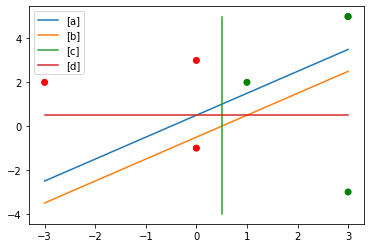

In [3]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])

def color_pts(y):
    #green is +1, red is -1
    col=[]
    for i in range(len(y)):
        if(y[i]>0): col.append('green')
        else: col.append('red')
    return col

def plot_pts(pts,y):
    col=color_pts(y)
    plt.scatter(pts[:,0],pts[:,1],color=col)

def transform(pts):
    res=[]
    for i in range(len(pts)):
        x1=pts[i][0]
        x2=pts[i][1]
        res.append([x2**2-2*x1-1,x1**2-2*x2+1])
    return np.array(res)

def line(x,w,b):
    if(w[1]==0):
        return -b/w[0]
    else:    
        return -w[0]/w[1]*x-b/w[1]
    
w1=[-1,1]
w2=[1,-1]
w3=[1,0]
w4=[0,1]
b=-0.5

z=transform(x)
xaxis=np.linspace(-3,3,100)
yaxis=np.linspace(-4,5,100)

w1line=[line(x,w1,b) for x in xaxis]
w2line=[line(x,w2,b) for x in xaxis]
w3line=[line(x,w3,b) for x in xaxis]
w4line=[line(x,w4,b) for x in xaxis]

plot_pts(z,y)
plt.plot(xaxis, w1line,label="[a]")
plt.plot(xaxis, w2line,label="[b]")
plt.plot(w3line,yaxis,label="[c]")
plt.plot(xaxis, w4line,label="[d]")
plt.legend()
plt.show()

## Problem 12

### Answer: [c] $4-5$

### Code:

In [4]:
from sklearn import svm

clf = svm.SVC(C=np.Inf, kernel='poly',degree=2, coef0=1,gamma=1)
clf.fit(x, y)
gin=clf.predict(x)
testgin=(gin==y)
Ein=len(np.where(testgin==False)[0])/len(y)

print(f'Support vectors found: {clf.support_vectors_.shape[0]}')
print(f'E_in={Ein}')

Support vectors found: 5
E_in=0.0


# Radial Basis Functions

## Preliminary Code

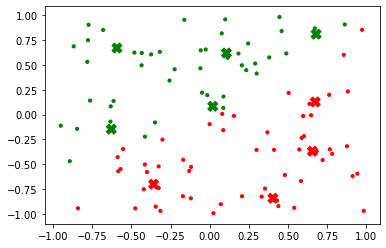

In [5]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cluster import KMeans

#Generate and Plot Data-Points

def color_pts(y):
    #green is +1, red is -1
    col=[]
    for i in range(len(y)):
        if(y[i]>0): col.append('green')
        else: col.append('red')
    return col

def plot_pts(pts,y,marker='o',size=10):
    col=color_pts(y)
    plt.scatter(pts[:,0],pts[:,1],color=col,marker=marker,s=size)

def gen_uniform_points(N,d=2,vmin=[-1,-1],vmax=[1,1]):
    if(d!=len(vmin)|d!=len(vmax)): 
        raise Exception('WARNING: Boundary values do not match the dimensionality of the problem!')
    pts=np.random.uniform(low=vmin,high=vmax,size=(N,d))
    return pts

def f(x):
    return x[1]-x[0]+0.25*np.sin(np.pi*x[1])

def label_f(pts,f):
    y=[]
    for i in range(len(pts)):
        y.append(np.sign(f(pts[i])))
    return np.array(y)

#HardSVM algo

def HardSVM_rbf(x,y,gamma,Nval=1000):
    clf = svm.SVC(C=np.Inf,kernel='rbf',gamma=gamma)
    clf.fit(x, y)
    svs=clf.support_vectors_.shape[0]
    
    #Ein computation
    gin=clf.predict(x)
    testgin=(gin==y)
    Ein=len(np.where(testgin==False)[0])/len(y)
    
    #Eout computation
    val_pts=gen_uniform_points(Nval)
    y_val=label_f(val_pts,f)
    gout=clf.predict(val_pts)
    testgout=(gout==y_val)
    Eout=len(np.where(testgout==False)[0])/len(y_val)
    
    return Ein,Eout

#Regular RBF

def phi(x,mu,gamma):
    return np.exp(-gamma*np.sum((x-mu)**2))

def Z_rbf(x,center,gamma):
    exp=np.array([[phi(i,j,gamma) for j in center] for i in x])
    return np.concatenate((np.ones(len(x))[:, np.newaxis], exp), axis=1)

def RBF(x,y,gamma,k,plot_cent=False,Nval=1000):
    kmeans = KMeans(n_clusters=k).fit(x)
    center=kmeans.cluster_centers_
    y_center=label_f(center,f)
    if(plot_cent==True):
        plot_pts(center,y_center,marker='X',size=100)
    
    Z=Z_rbf(x,center,gamma)
    
    w=np.dot(np.linalg.pinv(Z),y)
    
    #Ein
    gin=np.sign(np.dot(Z,w))
    testgin=(gin==y)
    Ein=len(np.where(testgin==False)[0])/len(y)
    
    #Eout
    val_pts=gen_uniform_points(Nval)
    Z_val=Z_rbf(val_pts,center,gamma)
    y_val=label_f(val_pts,f)
    gout=np.sign(np.dot(Z_val,w))
    testgout=(gout==y_val)
    Eout=len(np.where(testgout==False)[0])/len(y_val)
    
    return Ein,Eout

#Plotted Example with regular RBF: the crosses are the centers of the clusters found via Lloyd algorithm

pts=gen_uniform_points(100)
y=label_f(pts,f)
plot_pts(pts,y)
res=RBF(pts,y,1.5,9,plot_cent=True,Nval=1000)

## Problems 13-14

### Answers: [a] $\le 5\%$ of the time, [e] $\ge 75\%$ of the time

### Code:

In [6]:
Nruns=100
Npts=100
gamma=1.5
k=9
counter_p13=0
counter_p14=0 

for i in range(Nruns):
    pts=gen_uniform_points(Npts)
    y=label_f(pts,f)
    EinSVM,EoutSVM=HardSVM_rbf(pts,y,gamma)
    EinRBF,EoutRBF=RBF(pts,y,gamma,k)
    if(EinSVM!=0): counter_p13+=1
    if(EoutSVM<EoutRBF): counter_p14+=1
        
print(f'Problem 13:\nOut of Nruns={Nruns}, the datasets are not separable \n(using hard-margin SVM) {counter_p13/Nruns*100:.0f}% of the time.\n')
print(f'Problem 14:\nOut of Nruns={Nruns}, kernel beats regular RBF (gamma={gamma} and k={k}) \n{counter_p14/Nruns*100:.0f}% of the time.')

Problem 13:
Out of Nruns=100, the datasets are not separable 
(using hard-margin SVM) 0% of the time.

Problem 14:
Out of Nruns=100, kernel beats regular RBF (gamma=1.5 and k=9) 
81% of the time.


## Problem 15

### Answer: [d] $> 60\%$ but $\le 90\%$ of the time

### Code:

In [7]:
Nruns=100
Npts=100
gamma=1.5
k=12
counter_p15=0

for i in range(Nruns):
    pts=gen_uniform_points(Npts)
    y=label_f(pts,f)
    EinSVM,EoutSVM=HardSVM_rbf(pts,y,gamma)
    EinRBF,EoutRBF=RBF(pts,y,gamma,k)
    if(EoutSVM<EoutRBF): counter_p15+=1
        
print(f'Problem 15:\nOut of Nruns={Nruns}, kernel beats regular RBF (gamma={gamma} and k={k}) \n{counter_p15/Nruns*100:.0f}% of the time.')

Problem 15:
Out of Nruns=100, kernel beats regular RBF (gamma=1.5 and k=12) 
70% of the time.


## Problem 16

### Answer: [d] Both $E_{in}$ and $E_{out}$ go down

### Code:

In [8]:
#Problem 16
Nruns=100
Npts=100
gamma=1.5
counter_p16=np.zeros(5)

for i in range(Nruns):
    pts=gen_uniform_points(Npts)
    y=label_f(pts,f)
    Ein_k9,Eout_k9=RBF(pts,y,gamma,9)
    Ein_k12,Eout_k12=RBF(pts,y,gamma,12)
    if((Ein_k9>Ein_k12)&(Eout_k9<Eout_k12)): counter_p16[0]+=1
    if((Ein_k9<Ein_k12)&(Eout_k9>Eout_k12)): counter_p16[1]+=1
    if((Ein_k9<Ein_k12)&(Eout_k9<Eout_k12)): counter_p16[2]+=1
    if((Ein_k9>Ein_k12)&(Eout_k9>Eout_k12)): counter_p16[3]+=1
    if((Ein_k9==Ein_k12)&(Eout_k9==Eout_k12)): counter_p16[4]+=1
    
print(f'Problem 16:\nOut of Nruns={Nruns},\n[a] Ein goes down, but Eout goes up {counter_p16[0]:.0f} times\n[b] Ein goes up, but Eout goes down {counter_p16[1]:.0f} times\n[c] Both Ein and Eout go up {counter_p16[2]:.0f} times\n[d] Both Ein and Eout go down {counter_p16[3]:.0f} times\n[e] Ein and Eout remain the same {counter_p16[4]:.0f} times.')

Problem 16:
Out of Nruns=100,
[a] Ein goes down, but Eout goes up 16 times
[b] Ein goes up, but Eout goes down 3 times
[c] Both Ein and Eout go up 7 times
[d] Both Ein and Eout go down 34 times
[e] Ein and Eout remain the same 0 times.


## Problem 17

### Answer: [c] Both $E_{in}$ and $E_{out}$ go up

### Code:

In [9]:
Nruns=100
Npts=100
k=9
counter_p17=np.zeros(5)

for i in range(Nruns):
    pts=gen_uniform_points(Npts)
    y=label_f(pts,f)
    Ein_g1,Eout_g1=RBF(pts,y,1.5,k)
    Ein_g2,Eout_g2=RBF(pts,y,2,k)
    if((Ein_g1>Ein_g2)&(Eout_g1<Eout_g2)): counter_p17[0]+=1
    if((Ein_g1<Ein_g2)&(Eout_g1>Eout_g2)): counter_p17[1]+=1
    if((Ein_g1<Ein_g2)&(Eout_g1<Eout_g2)): counter_p17[2]+=1
    if((Ein_g1>Ein_g2)&(Eout_g1>Eout_g2)): counter_p17[3]+=1
    if((Ein_g1==Ein_g2)&(Eout_g1==Eout_g2)): counter_p17[4]+=1
              
print(f'Problem 17:\nOut of Nruns={Nruns},\n[a] Ein goes down, but Eout goes up {counter_p17[0]:.0f} times\n[b] Ein goes up, but Eout goes down {counter_p17[1]:.0f} times\n[c] Both Ein and Eout go up {counter_p17[2]:.0f} times\n[d] Both Ein and Eout go down {counter_p17[3]:.0f} times\n[e] Ein and Eout remain the same {counter_p17[4]:.0f} times.')

Problem 17:
Out of Nruns=100,
[a] Ein goes down, but Eout goes up 5 times
[b] Ein goes up, but Eout goes down 14 times
[c] Both Ein and Eout go up 21 times
[d] Both Ein and Eout go down 9 times
[e] Ein and Eout remain the same 1 times.


## Problem 18

### Answer: [a] $\le 10 \%$ of the time

### Code:

In [10]:
Nruns=100
Npts=100
k=9
gamma=1.5
counter_p18=0

for i in range(Nruns):
    pts=gen_uniform_points(Npts)
    y=label_f(pts,f)
    Ein,Eout=RBF(pts,y,gamma,k)
    if(Ein==0): counter_p18+=1
              
print(f'Problem 18:\nOut of Nruns={Nruns},\nregular RBF achieves Ein=0 (with gamma={gamma} and k={k}) {counter_p18/Nruns*100:.0f}% of the times')

Problem 18:
Out of Nruns=100,
regular RBF achieves Ein=0 (with gamma=1.5 and k=9) 7% of the times
